In [253]:
import pandas as pd

In [254]:
data = pd.read_csv(r'data\51st vs 36th R1\Plane\Enemies_PlaneId_108.csv', usecols=['Unix time', 'Roll', 'Pitch', 'Yaw', 'Longitude', 'Latitude','Altitude'])
# 设置 Unix time 为 index，并且保留这一列
data.set_index('Unix time', inplace=True, drop=False)
data.head()

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw
Unix time,,,,,,,
171,171,42.049958,42.244589,15.39,0.4,1.2,326.0
172,172,42.049957,42.244590,15.63,0.5,1.5,326.0
173,173,42.049956,42.244590,15.71,0.2,-0.4,326.0
174,174,42.049957,42.244590,15.52,0.3,0.0,326.0
175,175,42.049957,42.244590,15.57,0.3,0.0,326.0


In [255]:
# 计算俯仰角变化率
data['Pitch_rate'] = data['Pitch'].diff()
data['Pitch_rate'] = data['Pitch_rate'].fillna(0)

# 计算横滚角变化率
data['Roll_rate'] = data['Roll'].diff()
data['Roll_rate'] = data['Roll_rate'].fillna(0)

# 计算偏航角变化率
data['Yaw_rate'] = data['Yaw'].diff()
data['Yaw_rate'] = data['Yaw_rate'].fillna(0)

data
# 将大于180度的偏航角变化率变为负数
data.loc[data['Yaw'] > 200, 'Yaw'] = data['Yaw'] - 360
data

,Unix time,Longitude,Latitude,Altitude,Roll,Pitch,Yaw,Pitch_rate,Roll_rate,Yaw_rate
Unix time,,,,,,,,,,
171,171,42.049958,42.244589,15.39,0.4,1.2,-34.0,0.0,0.0,0.0
172,172,42.049957,42.244590,15.63,0.5,1.5,-34.0,0.3,0.1,0.0
173,173,42.049956,42.244590,15.71,0.2,-0.4,-34.0,-1.9,-0.3,0.0
174,174,42.049957,42.244590,15.52,0.3,0.0,-34.0,0.4,0.1,0.0
175,175,42.049957,42.244590,15.57,0.3,0.0,-34.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3851,3851,40.828980,43.821314,2036.20,78.1,10.5,-17.3,-0.3,-3.2,8.3
3852,3852,40.827905,43.823229,2074.86,70.7,10.2,-16.0,-0.3,-7.4,1.3
3853,3853,40.826990,43.825219,2109.95,29.4,9.7,-15.3,-0.5,-41.3,0.7


In [256]:
times = []

# 找到 Roll 在 -20 与 -70 之间的时间
for i in range(len(data)):
    if (-80 < data.iloc[i]['Roll'] < -20 or 20 < data.iloc[i]['Roll'] < 80) and data.iloc[i]['Yaw_rate'] > 2 :
        times.append(data.iloc[i]['Unix time'])


# 遍历times, 转换为times_
times_ = []
temp = []
for i in range(len(times)):
    temp.append(times[i])
    if times[i] + 1 not in times:
        times_.append(temp)
        temp = []

# 求俯仰角累积变化量
pitch_acc = []
for i in range(len(times_)):
    temp = 0
    for j in range(len(times_[i]) - 1):
        if data.loc[times_[i][j+1]]['Yaw'] * data.loc[times_[i][j]]['Yaw'] < 0:
            temp += abs(data.loc[times_[i][j+1]]['Yaw'] + data.loc[times_[i][j]]['Yaw'])
        else:
            temp += abs(data.loc[times_[i][j+1]]['Yaw'] - data.loc[times_[i][j]]['Yaw'])
    pitch_acc.append(temp)



altitude_change = []
for i in range(len(times_)):
    temp = abs(data.loc[times_[i][-1]]['Altitude'] - data.loc[times_[i][0]]['Altitude'])
    altitude_change.append(temp)

flag = []
for i in range(len(pitch_acc)):
    if pitch_acc[i] >200 and altitude_change[i] <= 500:
        flag.append(i)

# flag
# times_[21]
# for i in range(len(times_[46])):
#     print(data.loc[times_[46][i]]['Yaw'])
flag

[30, 33, 41]

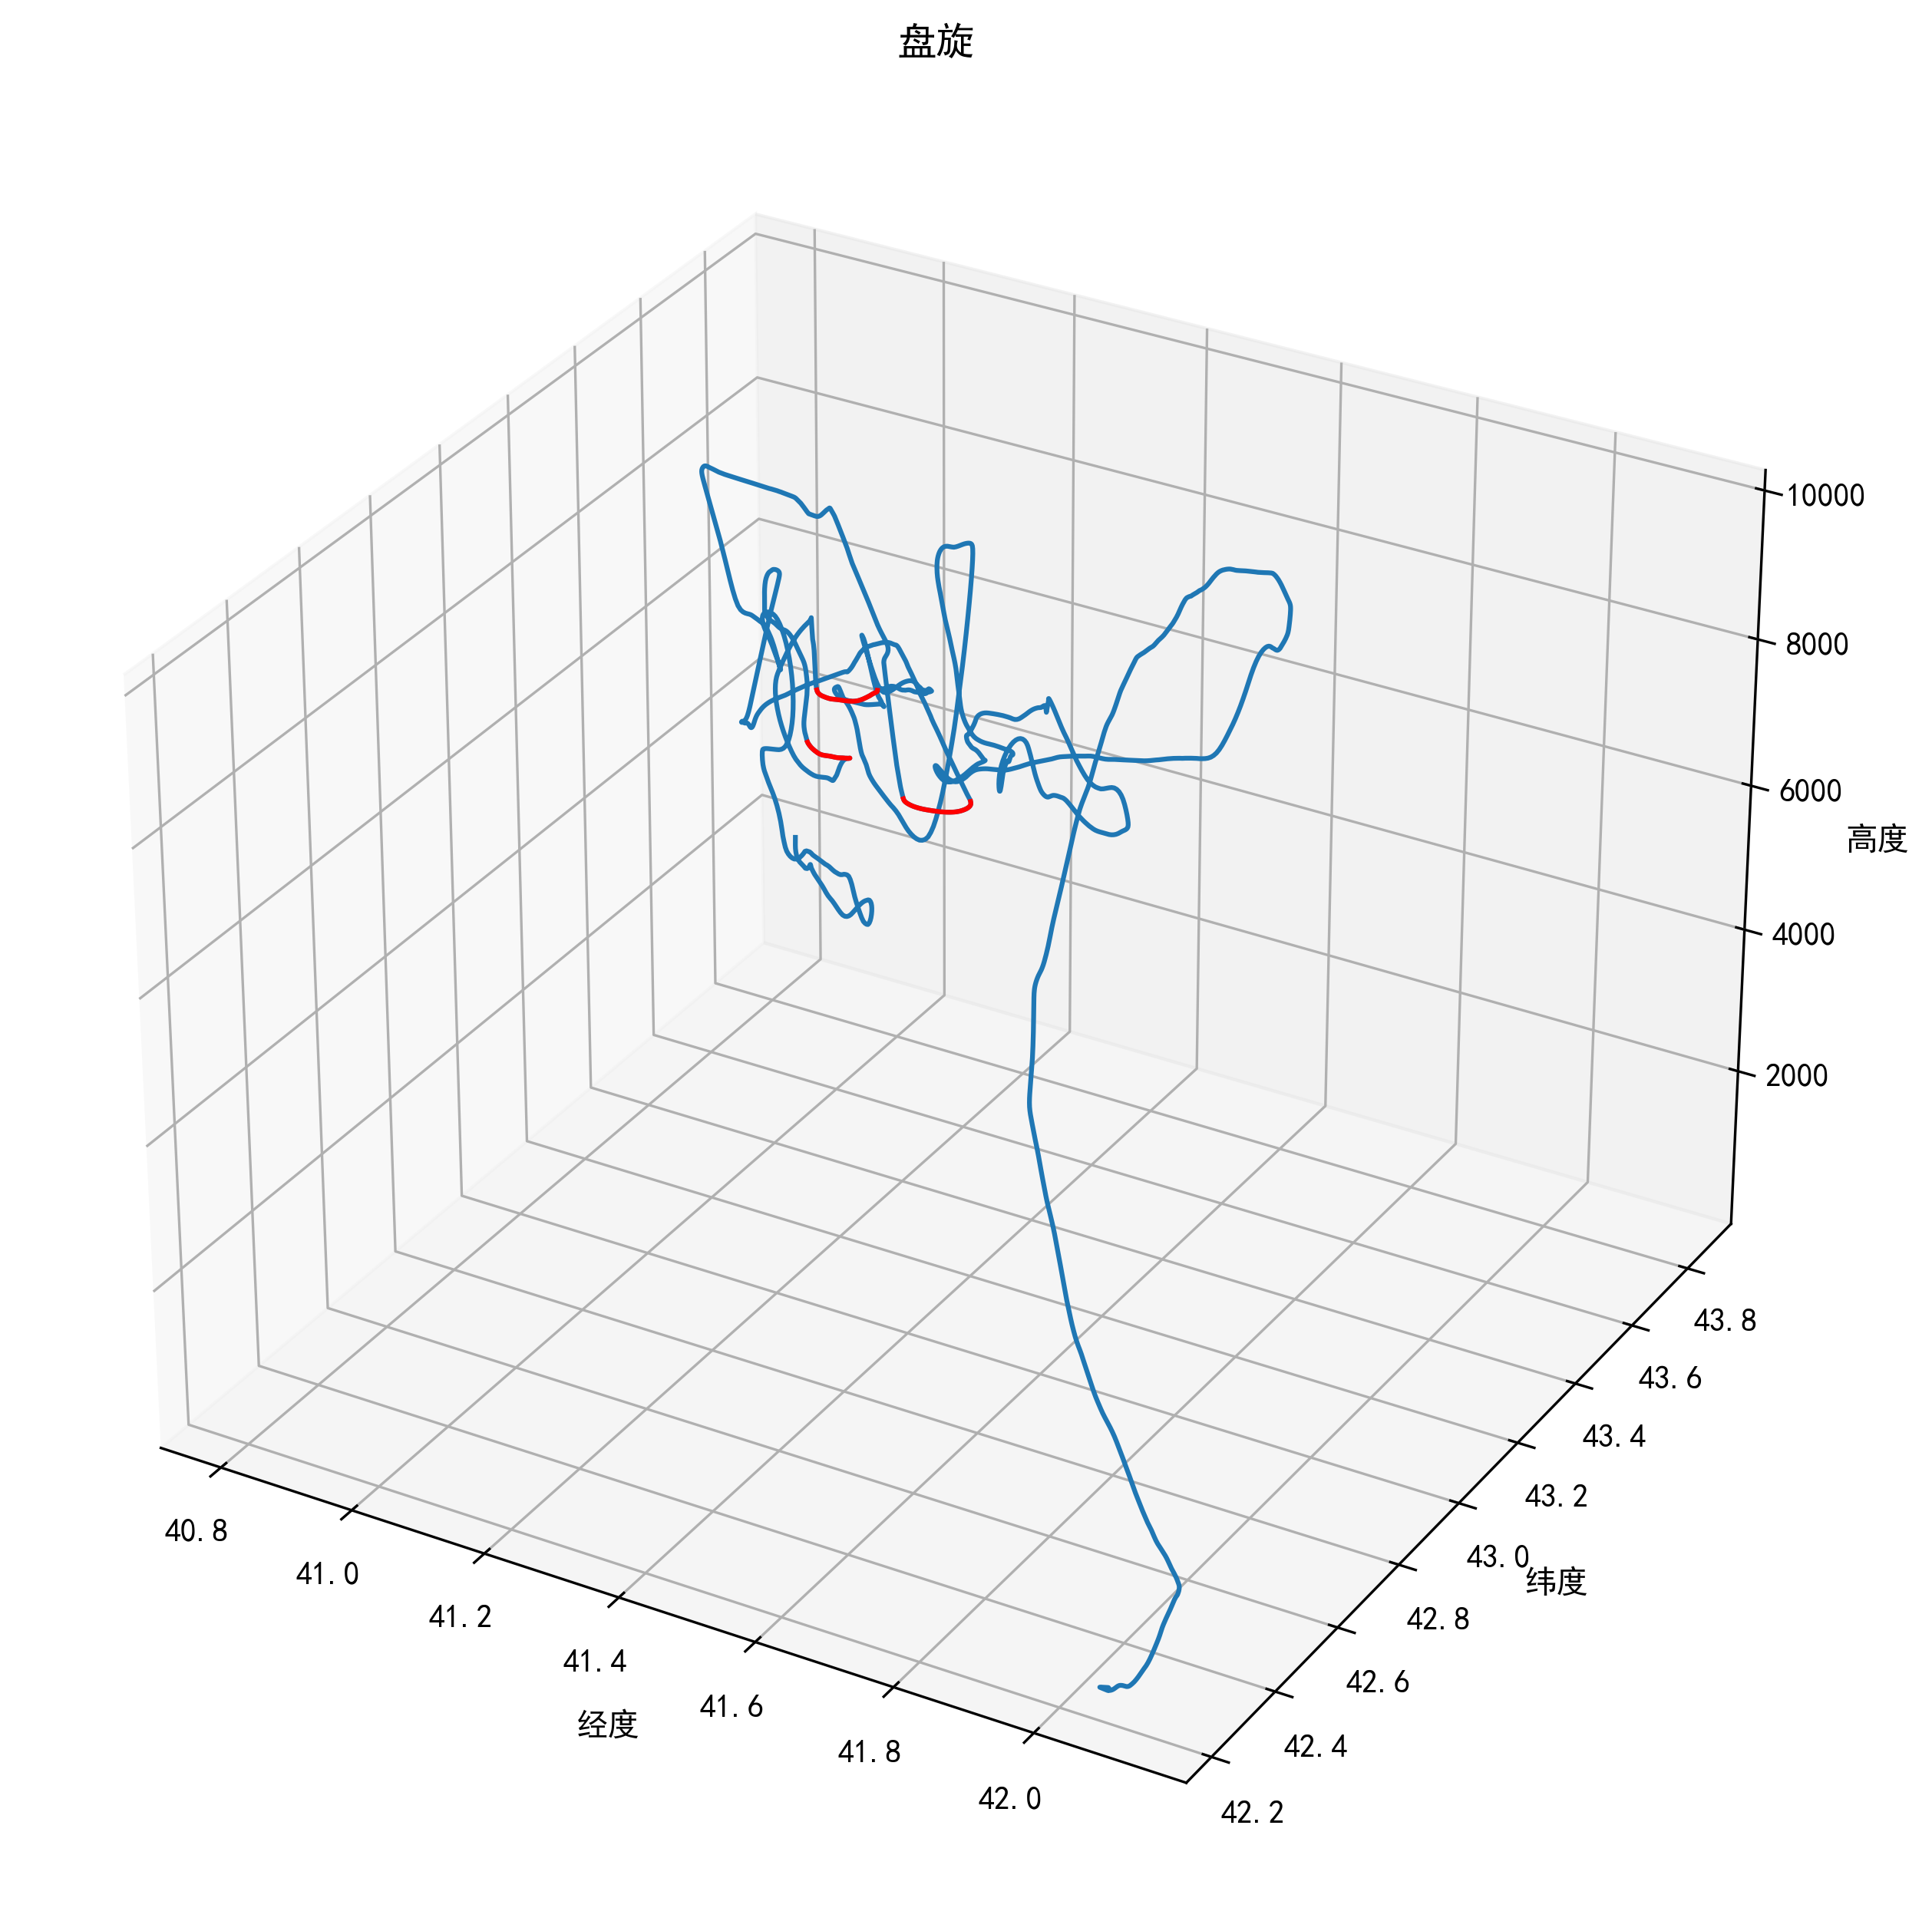

[[41.2323938,
  41.2333379,
  41.2341609,
  41.2348138,
  41.2352867,
  41.2355484,
  41.2355878,
  41.2354047,
  41.2349974,
  41.2343672,
  41.2335197,
  41.2324907,
  41.2312492,
  41.2298055,
  41.2281716,
  41.2263503,
  41.2243669,
  41.2222101,
  41.2199201,
  41.2174795,
  41.214928,
  41.212258,
  41.2095066,
  41.2066585,
  41.2037382,
  41.2007699,
  41.1977582,
  41.1947354,
  41.1916804,
  41.188643,
  41.1856316,
  41.1826618,
  41.1797364,
  41.1768785,
  41.1741086,
  41.1714279,
  41.1688521,
  41.1663834,
  41.1640317,
  41.1617982,
  41.1596959,
  41.1577351,
  41.1559284,
  41.1542931,
  41.1528321],
 [41.170892,
  41.1727163,
  41.1743214,
  41.1756565,
  41.1766546,
  41.1773247,
  41.1776653,
  41.177695,
  41.1774291,
  41.1768728,
  41.176035,
  41.1749203,
  41.1735518,
  41.1719341,
  41.1700989,
  41.1680767,
  41.1658593,
  41.1634928,
  41.1609857,
  41.1583867,
  41.1557007,
  41.1529492,
  41.1501891,
  41.1474321,
  41.1447003,
  41.1420039,
  41.139364

In [257]:
# 获取经度、维度、高度
longitude = []
latitude = []
altitude = []
for i in range(len(data['Longitude'].to_list())):
    longitude.append(data['Longitude'].to_list()[i])
    latitude.append(data['Latitude'].to_list()[i])
    altitude.append(data['Altitude'].to_list()[i])


longitude1 = []
latitude1 = []
altitude1 = []
for i in range(len(flag)):
    temp_long = []
    temp_lat = []
    temp_alt = []
    for j in range(len(times_[flag[i]])):
        temp_long.append(data.loc[times_[flag[i]][j]]['Longitude'])
        temp_lat.append(data.loc[times_[flag[i]][j]]['Latitude'])
        temp_alt.append(data.loc[times_[flag[i]][j]]['Altitude'])
    longitude1.append(temp_long)
    latitude1.append(temp_lat)
    altitude1.append(temp_alt)




# 绘制三维轨迹图
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(longitude, latitude, altitude)
# 绘制在同一张图上一条红线
for i in range(len(longitude1)):
    ax.plot(longitude1[i], latitude1[i], altitude1[i], color='r')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ax.set_xlabel('经度')
ax.set_ylabel('纬度')
ax.set_zlabel('高度')

# 设置DPI为300
fig.set_dpi(300)
# 设置图片大小
fig.set_size_inches(18.5, 10.5)
# 设置标题
plt.title('盘旋')
# 保存图片
plt.savefig('./fig/盘旋.png', dpi=300)
plt.show()
longitude1 

